In [240]:
import pandas as pd
import csv
import matplotlib.pyplot as plt
from datetime import datetime
from datetime import timedelta
import numpy as np
from pprint import pprint

In [308]:
str_filename = '328_sales.csv'
str_filename2 = '334_mint.csv'

In [309]:
fh = open(str_filename)
csv_reader = csv.reader(fh)
fh_mint = open(str_filename2)
csv_reader2 = csv.reader(fh_mint)
fh_temp = open('temp.csv', 'w')

In [310]:
writer = csv.writer(fh_temp, delimiter=',')
writer.writerow( ['ID'] + next(csv_reader2))
writer.writerows([i] + row for i, row in enumerate(csv_reader2, 1))

In [311]:
fh_temp.close()
fh_temp = open('temp.csv', "rt")
csv_reader_temp = csv.reader(fh_temp)
csv_header = next(csv_reader)
csv_header2 = next(csv_reader_temp)
csv_header2.append('temp')

In [312]:
fh.close()
fh_mint.close()
fh_temp.close()

In [313]:
df_sig = pd.read_csv(str_filename, header=None, skiprows=1, names=csv_header)
df_sig
df_sig2 = pd.read_csv('temp.csv', header=None, skiprows=1, names=csv_header2)
i = 0
for row in df_sig['block_time']:
    row = row.replace('+00:00', '')
    row = row.replace('T', ' ')
    df_sig.at[i, 'block_time'] = row
    i += 1
df_sig2

,ID,Txhash,Blockno,UnixTimestamp,DateTime,From,To,ContractAddress,Value_IN(ETH),Value_OUT(ETH),CurrentValue @ $1634.57/Eth,TxnFee(ETH),TxnFee(USD),Historical $Price/Eth,Status,ErrCode,Method,temp
0,1,0xfe083f7913b67f7e6dd09073c5dbddcc13ec3b7859fd...,15127384,1657622920,2022-07-12 10:48:40,0x06e781abba9ae7394f9c772872562f95daa8ec7f,0xd94c7060808f3c876824e57e685702f3834d2e13,NaN,0.000000,0,0.000000,0.000353,0.576617,1037.37,Error(0),execution reverted,Purchase,NaN
1,2,0x436d447972566c48ab9950ae075a9a9ed6a553440c25...,15131139,1657672646,2022-07-13 00:37:26,0x0ce1a4f1c6c636cd4e29357e1904b7b7eac95dba,0xd94c7060808f3c876824e57e685702f3834d2e13,NaN,0.000010,0,0.016346,0.000676,1.104953,1114.57,Error(0),execution reverted,Purchase,NaN
2,3,0x4ad7bac1c14c48403d8b4e088d607bdedf0ffcfc35f8...,15131139,1657672646,2022-07-13 00:37:26,0x95282d3eb1f60f878b04de4066cea178eca5b59c,0xd94c7060808f3c876824e57e685702f3834d2e13,NaN,0.000010,0,0.016346,0.000676,1.104953,1114.57,Error(0),execution reverted,Purchase,NaN
3,4,0xddd0a456836b8c3641613e7feb8c98b2ed2c7f2eb814...,15134263,1657715342,2022-07-13 12:29:02,0x06e781abba9ae7394f9c772872562f95daa8ec7f,0xd94c7060808f3c876824e57e685702f3834d2e13,NaN,0.000100,0,0.163457,0.001052,1.718816,1114.57,Error(0),execution reverted,Purchase,NaN
4,5,0xe0ae322bf882fe3d50ccfa803663780acfd273787736...,15135474,1657731516,2022-07-13 16:58:36,0xa99769374167111a2bbe790cac9e34ee95a33f1c,0xd94c7060808f3c876824e57e685702f3834d2e13,NaN,0.000000,0,0.000000,0.001029,1.682259,1114.57,Error(0),execution reverted,Purchase,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
908,909,0x1e717d90495cb51c727dcdc460540957191c8f369c44...,15135556,1657732770,2022-07-13 17:19:30,0xf0df1fc0eddb8b9d9b35a879ee7bbda337fc5d8b,0xd94c7060808f3c876824e57e685702f3834d2e13,NaN,2.918567,0,4770.601694,0.001986,3.245542,1114.57,Error(0),execution reverted,Purchase,NaN
909,910,0x3e54f9999b8dd770ccf322bb210978b5579a9a8d9694...,15135556,1657732770,2022-07-13 17:19:30,0x6daeee74f79ecbeec23be08686323512aa0baba7,0xd94c7060808f3c876824e57e685702f3834d2e13,NaN,2.918567,0,4770.601694,0.001986,3.245542,1114.57,Error(0),execution reverted,Purchase,NaN
910,911,0x26b1f5a12c2d130a9a0ac3af3fa8366a4d2e2c6b83c9...,15135556,1657732770,2022-07-13 17:19:30,0x85aa8ef55f47ff9e68dc69b8e4cec635fc42fd73,0xd94c7060808f3c876824e57e685702f3834d2e13,NaN,2.918567,0,4770.601694,0.001986,3.245542,1114.57,Error(0),execution reverted,Purchase,NaN
911,912,0xa2db5346761e337ecba1f1c2e59f09cc0c0e7c63ce3f...,15135556,1657732770,2022-07-13 17:19:30,0x53562e8ecee54356dc89ad263a444528b34d6c80,0xd94c7060808f3c876824e57e685702f3834d2e13,NaN,2.912052,0,4759.953029,0.001986,3.245542,1114.57,Error(0),execution reverted,Purchase,NaN


In [314]:
df_sig['Date'] = df_sig['block_time'].map(lambda x: datetime.strptime(str(x), '%Y-%m-%d %H:%M:%S'))
df_sig['Date']
df_sig2['Date'] = df_sig2['DateTime'].map(lambda x: datetime.strptime(str(x), '%Y-%m-%d %H:%M:%S'))

In [315]:
mintStart = datetime.strptime("2022-06-29 17:00:00", '%Y-%m-%d %H:%M:%S')
endDate = datetime.strptime("2022-07-01 17:00:00", '%Y-%m-%d %H:%M:%S')
collection_size = 500
df_new=df_sig.loc[(df_sig['Date'] <= endDate)]
df_new=df_new.loc[(df_sig['Date'] >= mintStart)]
df_new['Date'] = pd.to_datetime(df_new['Date'])
df_new = df_new.set_index('Date')
df_new = df_new.resample('25T').mean()
df_new=df_new.loc[(df_new['eth_price'] >= 0.5)]
df_new

,eth_price,usd_price
Date,,
2022-06-29 17:30:00,2.215000,2421.359566
2022-06-29 17:55:00,2.500385,2750.685315
2022-06-29 18:20:00,2.220357,2453.418388
2022-06-29 18:45:00,3.157857,3483.815898
2022-06-29 19:10:00,4.162500,4607.553849
2022-06-29 19:35:00,2.483333,2752.482167
2022-06-29 20:00:00,2.100000,2345.826000
2022-06-29 20:25:00,2.200000,2449.788000
2022-06-29 21:40:00,1.990000,2213.059100


final mint price:
2.868078175895765
first mint price - final mint price:
0.1319218241042348


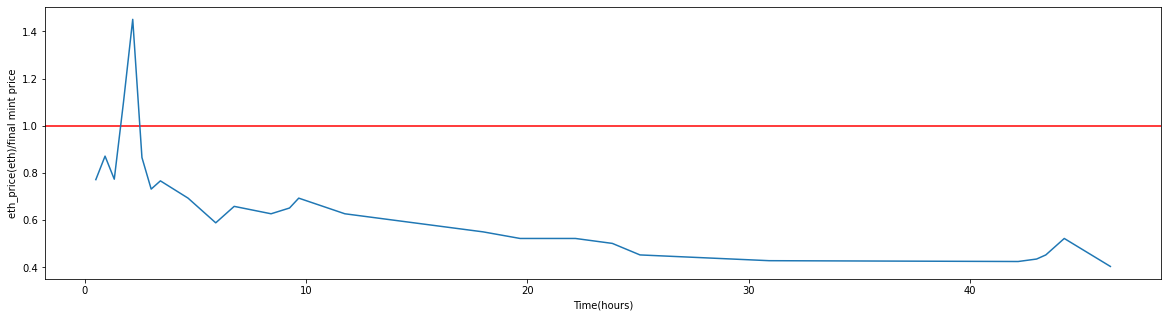

In [316]:
df_sig2 = df_sig2.loc[(df_sig2['Date'] >= mintStart)]
df_sig2 = df_sig2.loc[(df_sig2['ErrCode'] != 'execution reverted')]
final_mint_price = df_sig2['Value_IN(ETH)']
y = (df_new['eth_price'] / final_mint_price[collection_size])
x = df_new.index
x = x - mintStart
x = x.total_seconds() / 3600
plt.xlabel('Time(hours)')
plt.ylabel('eth_price(eth)/final mint price')
plt.rcParams["figure.figsize"] = (20,5)
print("final mint price:")
print (final_mint_price[collection_size])
print("first mint price - final mint price:")
print(final_mint_price.iloc[0] - final_mint_price[collection_size])
plt.plot(x,y)